In [1]:
# block-1: import library
import pandas as pd
import xlrd
import numpy as np

In [2]:
# block-2: load data source
# data_1 = pd.read_excel(r'C:\Users\Fahim Hadi Maula\Documents\No Party\01 - From office\DATA UTILITY.xlsx', sheet_name = 'DATA1')
# data_2 = pd.read_excel(r'C:\Users\Fahim Hadi Maula\Documents\No Party\01 - From office\DATA UTILITY.xlsx', sheet_name = 'DATA2')
# data_3 = pd.read_excel(r'C:\Users\Fahim Hadi Maula\Documents\No Party\01 - From office\DATA UTILITY.xlsx', sheet_name = 'DATA3')
data_1 = pd.read_excel(r'D:\14-Report Engineering\DATA UTILITY.xlsx', sheet_name = 'DATA1')
data_2 = pd.read_excel(r'D:\14-Report Engineering\DATA UTILITY.xlsx', sheet_name = 'DATA2')
data_3 = pd.read_excel(r'D:\14-Report Engineering\DATA UTILITY.xlsx', sheet_name = 'DATA3')

In [3]:
# block-3: merge two data
data_mh = pd.concat([data_1, data_2], ignore_index=True)
data_mh = data_mh.sort_values(['name', 'date_start'], ascending=True)
data_mh.reset_index(inplace=True, drop=True)

In [4]:
# block-3a: cek overlap
data_mh['remark'] = 'no_overlap'
for idx in range(1, len(data_mh.index)-1):
    if ((data_mh.loc[idx, 'name'] == data_mh.loc[idx+1, 'name']) & (data_mh.loc[idx+1, 'date_start'] < data_mh.loc[idx, 'date_finish'])) or ((data_mh.loc[idx, 'name'] == data_mh.loc[idx-1, 'name']) & (data_mh.loc[idx, 'date_start'] < data_mh.loc[idx-1, 'date_finish'])):
        data_mh.at[idx, 'remark'] = 'overlap'
data_mh[data_mh['remark'] == 'overlap']

,name,year,month,week,day,day_cat,shift,task_cat,wo,wo_status,system,machine,date_start,date_finish,duration,remark


In [5]:
# block-4: add Planned_spare_time for idle time in early shift
data_mh = data_mh.drop('remark', axis=1)
data_mh['only_date_start'] = data_mh['date_start'].dt.date
data_mh['hour_start'] = data_mh['date_start'].dt.hour + (data_mh['date_start'].dt.minute / 60)
col = data_mh.columns
data = []
for idx in range(1, len(data_mh.index)):
    if data_mh.loc[idx, 'day_cat'] == 'normal':
        if (data_mh.loc[idx-1, 'only_date_start'] != data_mh.loc[idx, 'only_date_start'] and data_mh.loc[idx, 'shift'] == 1) and data_mh.loc[idx, 'hour_start'] > 6.00:
            data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Planned', 'AZ', 'done', 'others', 'Planned_spare_time', data_mh['date_start'].dt.date.apply(str)[idx] + str(' 06:00:00'), data_mh.loc[idx, 'date_start'], 'AZ', 'done', 'others'])
        elif (data_mh.loc[idx-1, 'only_date_start'] != data_mh.loc[idx, 'only_date_start'] and data_mh.loc[idx, 'shift'] == 2) and data_mh.loc[idx, 'hour_start'] > 14.0:
            data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Planned', 'AZ', 'done', 'others', 'Planned_spare_time', data_mh['date_start'].dt.date.apply(str)[idx] + str(' 14:00:00'), data_mh.loc[idx, 'date_start'], 'AZ', 'done', 'others'])
        elif (data_mh.loc[idx, 'date_start'] - data_mh.loc[idx-1, 'date_finish']) / np.timedelta64(1, 'h') > 5 and data_mh.loc[idx, 'shift'] == 3 and data_mh.loc[idx, 'hour_start'] > 22.0:
            data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Planned', 'AZ', 'done', 'others', 'Planned_spare_time', data_mh['date_start'].dt.date.apply(str)[idx] + str(' 22:00:00'), data_mh.loc[idx, 'date_start'], 'AZ', 'done', 'others'])
        elif (data_mh.loc[idx-1, 'only_date_start'] != data_mh.loc[idx, 'only_date_start'] and data_mh.loc[idx, 'shift'] == 4) and data_mh.loc[idx, 'hour_start'] > 7.5:
            data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Planned', 'AZ', 'done', 'others', 'Planned_spare_time', data_mh['date_start'].dt.date.apply(str)[idx] + str(' 07:30:00'), data_mh.loc[idx, 'date_start'], 'AZ', 'done', 'others'])
    elif data_mh.loc[idx, 'day_cat'] == 'overtime':
        if (data_mh.loc[idx-1, 'only_date_start'] != data_mh.loc[idx, 'only_date_start'] and data_mh.loc[idx, 'shift'] == 1) and data_mh.loc[idx, 'hour_start'] > 6.00:
            data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Planned', 'AZ', 'done', 'others', 'Planned_spare_time', data_mh['date_start'].dt.date.apply(str)[idx] + str(' 06:00:00'), data_mh.loc[idx, 'date_start'], 'AZ', 'done', 'others'])
        elif (data_mh.loc[idx-1, 'only_date_start'] != data_mh.loc[idx, 'only_date_start'] and data_mh.loc[idx, 'shift'] == 2) and data_mh.loc[idx, 'hour_start'] > 13.5:
            data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Planned', 'AZ', 'done', 'others', 'Planned_spare_time', data_mh['date_start'].dt.date.apply(str)[idx] + str(' 13:30:00'), data_mh.loc[idx, 'date_start'], 'AZ', 'done', 'others'])
        elif (data_mh.loc[idx, 'date_start'] - data_mh.loc[idx-1, 'date_finish']) / np.timedelta64(1, 'h') > 5 and data_mh.loc[idx, 'shift'] == 3 and data_mh.loc[idx, 'hour_start'] > 21.0:
            data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Planned', 'AZ', 'done', 'others', 'Planned_spare_time', data_mh['date_start'].dt.date.apply(str)[idx] + str(' 21:00:00'), data_mh.loc[idx, 'date_start'], 'AZ', 'done', 'others'])
        elif (data_mh.loc[idx-1, 'only_date_start'] != data_mh.loc[idx, 'only_date_start'] and data_mh.loc[idx, 'shift'] == 4) and data_mh.loc[idx, 'hour_start'] > 7.0:
            data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Planned', 'AZ', 'done', 'others', 'Planned_spare_time', data_mh['date_start'].dt.date.apply(str)[idx] + str(' 07:00:00'), data_mh.loc[idx, 'date_start'], 'AZ', 'done', 'others'])
        elif (data_mh.loc[idx-1, 'only_date_start'] != data_mh.loc[idx, 'only_date_start'] and data_mh.loc[idx, 'shift'] == 5) and data_mh.loc[idx, 'hour_start'] > 12.0:
            data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Planned', 'AZ', 'done', 'others', 'Planned_spare_time', data_mh['date_start'].dt.date.apply(str)[idx] + str(' 12:00:00'), data_mh.loc[idx, 'date_start'], 'AZ', 'done', 'others'])
data_df = pd.DataFrame(data, columns=col)
data_df['date_start'] = pd.to_datetime(data_df['date_start'])
data_df['duration'] = (data_df['date_finish'] - data_df['date_start']) / np.timedelta64(1, 'h')
data_df['only_date_start'] = data_df['date_start'].dt.date
data_df['hour_start'] = data_df['date_start'].dt.hour + (data_df['date_start'].dt.minute / 60)
data_mh = pd.concat([data_mh, data_df], ignore_index=True)
data_mh = data_mh.sort_values(['name', 'date_start'], ascending=True)
data_mh.reset_index(inplace=True, drop=True)
data_mh = data_mh.drop(['only_date_start','hour_start'], axis=1)

In [6]:
# block-5: add Planned_spare_time for idle time in end of shift
data_mh['only_date_finish'] = data_mh['date_finish'].dt.date
data_mh['hour_finish'] = data_mh['date_finish'].dt.hour + (data_mh['date_finish'].dt.minute / 60)
col = data_mh.columns
data = []
for idx in range(len(data_mh.index) - 1):
    if data_mh.loc[idx, 'day_cat'] == 'normal':
        if (data_mh.loc[idx+1, 'only_date_finish'] != data_mh.loc[idx, 'only_date_finish'] and data_mh.loc[idx, 'shift'] == 1) and data_mh.loc[idx, 'hour_finish'] < 14.5:
            data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Planned', 'AZ', 'done', 'others', 'Planned_spare_time', data_mh.loc[idx, 'date_finish'], data_mh['date_finish'].dt.date.apply(str)[idx] + str(' 14:30:00'), 'AZ', 'done', 'others'])
        elif data_mh.loc[idx+1, 'only_date_finish'] != data_mh.loc[idx, 'only_date_finish'] and data_mh.loc[idx, 'shift'] == 2 and data_mh.loc[idx, 'hour_finish'] < 22.5:
            data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Planned', 'AZ', 'done', 'others', 'Planned_spare_time', data_mh.loc[idx, 'date_finish'], data_mh['date_finish'].dt.date.apply(str)[idx] + str(' 22:30:00'), 'AZ', 'done', 'others'])
        elif (data_mh.loc[idx+1, 'date_start'] - data_mh.loc[idx, 'date_finish']) / np.timedelta64(1, 'h') > 5 and data_mh.loc[idx, 'shift'] == 3 and data_mh.loc[idx, 'hour_finish'] < 6.5:
            data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Planned', 'AZ', 'done', 'others', 'Planned_spare_time', data_mh.loc[idx, 'date_finish'], data_mh['date_finish'].dt.date.apply(str)[idx] + str(' 06:30:00'), 'AZ', 'done', 'others'])
        elif data_mh.loc[idx+1, 'only_date_finish'] != data_mh.loc[idx, 'only_date_finish'] and data_mh.loc[idx, 'shift'] == 4 and data_mh.loc[idx, 'hour_finish'] < 16.5:
            data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Planned', 'AZ', 'done', 'others', 'Planned_spare_time', data_mh.loc[idx, 'date_finish'], data_mh['date_finish'].dt.date.apply(str)[idx] + str(' 16:30:00'), 'AZ', 'done', 'others'])
    elif data_mh.loc[idx, 'day_cat'] == 'overtime':
        if data_mh.loc[idx+1, 'only_date_finish'] != data_mh.loc[idx, 'only_date_finish'] and data_mh.loc[idx, 'shift'] == 1 and data_mh.loc[idx, 'hour_finish'] < 13.0:
            data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Planned', 'AZ', 'done', 'others', 'Planned_spare_time', data_mh.loc[idx, 'date_finish'], data_mh['date_finish'].dt.date.apply(str)[idx] + str(' 13:00:00'), 'AZ', 'done', 'others'])
        elif data_mh.loc[idx+1, 'only_date_finish'] != data_mh.loc[idx, 'only_date_finish'] and data_mh.loc[idx, 'shift'] == 2 and data_mh.loc[idx, 'hour_finish'] < 21.0:
            data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Planned', 'AZ', 'done', 'others', 'Planned_spare_time', data_mh.loc[idx, 'date_finish'], data_mh['date_finish'].dt.date.apply(str)[idx] + str(' 21:00:00'), 'AZ', 'done', 'others'])
        elif (data_mh.loc[idx+1, 'date_start'] - data_mh.loc[idx, 'date_finish']) / np.timedelta64(1, 'h') > 5 and data_mh.loc[idx, 'shift'] == 3 and data_mh.loc[idx, 'hour_finish'] < 4.5:
            data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Planned', 'AZ', 'done', 'others', 'Planned_spare_time', data_mh.loc[idx, 'date_finish'], data_mh['date_finish'].dt.date.apply(str)[idx] + str(' 04:30:00'), 'AZ', 'done', 'others'])
        elif data_mh.loc[idx+1, 'only_date_finish'] != data_mh.loc[idx, 'only_date_finish'] and data_mh.loc[idx, 'shift'] == 4 and data_mh.loc[idx, 'hour_finish'] < 14.5:
            data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Planned', 'AZ', 'done', 'others', 'Planned_spare_time', data_mh.loc[idx, 'date_finish'], data_mh['date_finish'].dt.date.apply(str)[idx] + str(' 14:30:00'), 'AZ', 'done', 'others'])
        elif data_mh.loc[idx+1, 'only_date_finish'] != data_mh.loc[idx, 'only_date_finish'] and data_mh.loc[idx, 'shift'] == 5 and data_mh.loc[idx, 'hour_finish'] < 19.5:
            data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Planned', 'AZ', 'done', 'others', 'Planned_spare_time', data_mh.loc[idx, 'date_finish'], data_mh['date_finish'].dt.date.apply(str)[idx] + str(' 19:30:00'), 'AZ', 'done', 'others'])
data_df = pd.DataFrame(data, columns=col)
data_df['date_finish'] = pd.to_datetime(data_df['date_finish'])
data_df['duration'] = (data_df['date_finish'] - data_df['date_start']) / np.timedelta64(1, 'h')
data_df['only_date_finish'] = data_df['date_finish'].dt.date
data_df['hour_finish'] = data_df['date_finish'].dt.hour + (data_df['date_finish'].dt.minute / 60)
data_mh = pd.concat([data_mh, data_df], ignore_index=True)
data_mh = data_mh.sort_values(['name', 'date_start'], ascending=True)
data_mh.reset_index(inplace=True, drop=True)
data_mh = data_mh.drop(['only_date_finish', 'hour_finish'], axis=1)

In [7]:
# block-6: add Planned_spare_time in between activities
col = data_mh.columns
data = []
for idx in range(len(data_mh.index)-1):
    if (data_mh.loc[idx, 'date_finish'] != data_mh.loc[idx+1, 'date_start']) and ((data_mh.loc[idx+1, 'date_start'] - data_mh.loc[idx, 'date_finish']) / np.timedelta64(1, 'h') < 5.0) and (data_mh.loc[idx, 'name'] == data_mh.loc[idx+1, 'name']):
        data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Planned', 'AZ', 'done', 'others', 'Planned_spare_time', data_mh.loc[idx, 'date_finish'], data_mh.loc[idx+1, 'date_start'], 'NaN'])
data = pd.DataFrame(data, columns=col)
data['duration'] = (data['date_finish'] - data['date_start']) / np.timedelta64(1, 'h')
data_mh = pd.concat([data, data_mh], ignore_index=True)
data_mh = data_mh.sort_values(['name', 'date_start'], ascending=True)
data_mh.reset_index(inplace=True, drop=True)

In [8]:
# block-7: add break in each shift
data_mh['hour_start'] = data_mh['date_start'].dt.hour + (data_mh['date_start'].dt.minute / 60)
data_mh['hour_finish'] = data_mh['date_finish'].dt.hour + (data_mh['date_finish'].dt.minute / 60)
col = data_mh.columns
data = []
for idx in range(len(data_mh.index) - 1):
    if data_mh.loc[idx, 'shift'] == 1 and (data_mh.loc[idx, 'hour_start'] <= 10.0 and data_mh.loc[idx, 'hour_finish'] >= 10.5):
        data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Break', 'AZ', 'done', 'others', 'Break', data_mh['date_start'].dt.date.apply(str)[idx] + str(' 10:00:00'), data_mh['date_start'].dt.date.apply(str)[idx] + str(' 10:30:00'), 'AZ', 'done', 'others'])
        data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], data_mh.loc[idx, 'task_cat'], data_mh.loc[idx, 'wo'], data_mh.loc[idx, 'wo_status'], data_mh.loc[idx, 'system'], data_mh.loc[idx, 'machine'], data_mh['date_start'].dt.date.apply(str)[idx] + str(' 10:30:00'), data_mh.loc[idx, 'date_finish'], 'AZ', 'done', 'others'])
        data_mh.at[idx, 'date_finish'] = data_mh['date_finish'].dt.date.apply(str)[idx] + str(' 10:00:00')
    elif data_mh.loc[idx, 'shift'] == 2 and data_mh.loc[idx, 'hour_start'] <= 18.0 and data_mh.loc[idx, 'hour_finish'] >= 18.5:
        data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Break', 'AZ', 'done', 'others', 'Break', data_mh['date_start'].dt.date.apply(str)[idx] + str(' 18:00:00'), data_mh['date_start'].dt.date.apply(str)[idx] + str(' 18:30:00'), 'AZ', 'done', 'others'])
        data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], data_mh.loc[idx, 'task_cat'], data_mh.loc[idx, 'wo'], data_mh.loc[idx, 'wo_status'], data_mh.loc[idx, 'system'], data_mh.loc[idx, 'machine'], data_mh['date_start'].dt.date.apply(str)[idx] + str(' 18:30:00'), data_mh.loc[idx, 'date_finish'], 'AZ', 'done', 'others'])
        data_mh.at[idx, 'date_finish'] = data_mh['date_finish'].dt.date.apply(str)[idx] + str(' 18:00:00')
    elif data_mh.loc[idx, 'day_cat'] == 'normal' and data_mh.loc[idx, 'shift'] == 3 and data_mh.loc[idx, 'hour_start'] <= 2.0 and data_mh.loc[idx, 'hour_finish'] >= 2.5:
        data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Break', 'AZ', 'done', 'others', 'Break', data_mh['date_start'].dt.date.apply(str)[idx] + str(' 02:00:00'), data_mh['date_start'].dt.date.apply(str)[idx] + str(' 02:30:00'), 'AZ', 'done', 'others'])
        data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], data_mh.loc[idx, 'task_cat'], data_mh.loc[idx, 'wo'], data_mh.loc[idx, 'wo_status'], data_mh.loc[idx, 'system'], data_mh.loc[idx, 'machine'], data_mh['date_start'].dt.date.apply(str)[idx] + str(' 02:30:00'), data_mh.loc[idx, 'date_finish'], 'AZ', 'done', 'others'])
        data_mh.at[idx, 'date_finish'] = data_mh['date_finish'].dt.date.apply(str)[idx] + str(' 02:00:00')
    elif data_mh.loc[idx, 'day_cat'] == 'normal' and data_mh.loc[idx, 'shift'] == 4 and data_mh.loc[idx, 'hour_start'] <= 12.0 and data_mh.loc[idx, 'hour_finish'] >= 13.0:
        data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Break', 'AZ', 'done', 'others', 'Break', data_mh['date_start'].dt.date.apply(str)[idx] + str(' 12:00:00'), data_mh['date_start'].dt.date.apply(str)[idx] + str(' 13:00:00'), 'AZ', 'done', 'others'])
        data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], data_mh.loc[idx, 'task_cat'], data_mh.loc[idx, 'wo'], data_mh.loc[idx, 'wo_status'], data_mh.loc[idx, 'system'], data_mh.loc[idx, 'machine'], data_mh['date_start'].dt.date.apply(str)[idx] + str(' 13:00:00'), data_mh.loc[idx, 'date_finish'], 'AZ', 'done', 'others'])
        data_mh.at[idx, 'date_finish'] = data_mh['date_finish'].dt.date.apply(str)[idx] + str(' 12:00:00')
    elif data_mh.loc[idx, 'day_cat'] == 'overtime' and data_mh.loc[idx, 'shift'] == 3 and (data_mh['date_finish'].dt.date[idx] != data_mh['date_start'].dt.date[idx]):
        data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Break', 'AZ', 'done', 'others', 'Break', data_mh['date_start'].dt.date.apply(str)[idx] + str(' 23:59:59'), data_mh['date_finish'].dt.date.apply(str)[idx] + str(' 00:30:00'), 'AZ', 'done', 'others'])
        data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], data_mh.loc[idx, 'task_cat'], data_mh.loc[idx, 'wo'], data_mh.loc[idx, 'wo_status'], data_mh.loc[idx, 'system'], data_mh.loc[idx, 'machine'], data_mh['date_finish'].dt.date.apply(str)[idx] + str(' 00:30:00'), data_mh.loc[idx, 'date_finish'], 'AZ', 'done', 'others'])
        data_mh.at[idx, 'date_finish'] = data_mh['date_start'].dt.date.apply(str)[idx] + str(' 23:59:59')
    elif data_mh.loc[idx, 'day_cat'] == 'overtime' and data_mh.loc[idx, 'shift'] == 4 and data_mh.loc[idx, 'hour_start'] <= 10.0 and data_mh.loc[idx, 'hour_finish'] >= 10.5:
        data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Break', 'AZ', 'done', 'others', 'Break', data_mh['date_start'].dt.date.apply(str)[idx] + str(' 10:00:00'), data_mh['date_start'].dt.date.apply(str)[idx] + str(' 10:30:00'), 'AZ', 'done', 'others'])
        data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], data_mh.loc[idx, 'task_cat'], data_mh.loc[idx, 'wo'], data_mh.loc[idx, 'wo_status'], data_mh.loc[idx, 'system'], data_mh.loc[idx, 'machine'], data_mh['date_start'].dt.date.apply(str)[idx] + str(' 10:30:00'), data_mh.loc[idx, 'date_finish'], 'AZ', 'done', 'others'])
        data_mh.at[idx, 'date_finish'] = data_mh['date_finish'].dt.date.apply(str)[idx] + str(' 10:00:00')
    elif data_mh.loc[idx, 'shift'] == 5 and data_mh.loc[idx, 'hour_start'] <= 18.0 and data_mh.loc[idx, 'hour_finish'] >= 18.5:
        data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], 'Break', 'AZ', 'done', 'others', 'Break', data_mh['date_start'].dt.date.apply(str)[idx] + str(' 18:00:00'), data_mh['date_start'].dt.date.apply(str)[idx] + str(' 18:30:00'), 'AZ', 'done', 'others'])
        data.append([data_mh.loc[idx, 'name'], data_mh.loc[idx, 'year'], data_mh.loc[idx, 'month'], data_mh.loc[idx, 'week'], data_mh.loc[idx, 'day'], data_mh.loc[idx, 'day_cat'], data_mh.loc[idx, 'shift'], data_mh.loc[idx, 'task_cat'], data_mh.loc[idx, 'wo'], data_mh.loc[idx, 'wo_status'], data_mh.loc[idx, 'system'], data_mh.loc[idx, 'machine'], data_mh['date_start'].dt.date.apply(str)[idx] + str(' 18:30:00'), data_mh.loc[idx, 'date_finish'], 'AZ', 'done', 'others'])
        data_mh.at[idx, 'date_finish'] = data_mh['date_finish'].dt.date.apply(str)[idx] + str(' 18:00:00')
data = pd.DataFrame(data, columns=col)
data['date_start'] = pd.to_datetime(data['date_start'])
data['date_finish'] = pd.to_datetime(data['date_finish'])
data['duration'] = (data['date_finish'] - data['date_start']) / np.timedelta64(1, 'h')
data_mh = pd.concat([data, data_mh], ignore_index=True)
data_mh = data_mh.sort_values(['name', 'date_start'], ascending=True)
data_mh = data_mh.drop(['hour_start', 'hour_finish'], axis=1)
data_mh['duration'] = (data_mh['date_finish'] - data_mh['date_start']) / np.timedelta64(1, 'h')
data_mh = data_mh.drop(data_mh[data_mh.duration == 0].index, axis=0)
data_mh.reset_index(inplace=True, drop=True)

In [9]:
# block-8: convert Planned_spare_time to idle_time for Planned_spare_time is more than 2.5 hours
data_mh['flag_date'] = data_mh['date_start'].dt.date
data_mh['flag'] = 0.0
sumif = 0.0
for idx in range(1, len(data_mh.index)):
    if data_mh.loc[idx, 'flag_date'] == data_mh.loc[idx-1, 'flag_date']:
        if data_mh.loc[idx, 'machine'] == 'Planned_spare_time':
            sumif = sumif + data_mh.loc[idx, 'duration']
            data_mh.at[idx, 'flag'] = sumif
    else:
        sumif = 0.0
        if data_mh.loc[idx, 'machine'] == 'Planned_spare_time':
            sumif = sumif + data_mh.loc[idx, 'duration']
            data_mh.at[idx, 'flag'] = sumif
for idx in data_mh.index:
    if data_mh.loc[idx, 'flag'] >= 2.5:
        data_mh.at[idx, 'task_cat'] = 'Unplanned'
        data_mh.at[idx, 'machine'] = 'idle_time'
data_mh = data_mh.drop(['flag_date', 'flag'], axis=1)

In [10]:
# ---- save to excel -----
writer = pd.ExcelWriter('data_utility.xlsx')
data_mh.to_excel(writer, 'DATA')
writer.save()

In [11]:
# ---- create barplot with bokeh----
# %Productivity report per month - 2018
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, FactorRange, Span
from bokeh.plotting import figure
from bokeh.models import HoverTool
from math import pi
import itertools

mh_2019 = data_mh[data_mh['year'] == 2019] # replace 2019 >> 2018
mh_2019 = mh_2019.groupby(['name', 'week']).apply(lambda x: x[(x['task_cat'] != 'Break') & (x['task_cat'] != 'Unplanned')]['duration'].sum()*100.0/x[x['task_cat'] != 'Break']['duration'].sum()).unstack()

names = mh_2019.index.get_level_values(0).tolist()
weeks = data_mh[data_mh['year'] == 2019]['week'].unique().tolist() # replace 2019 >> 2018

x = [(name, str(week)) for name in names for week in weeks]
l = [mh_2019.loc[name, :].tolist() for name in names]
l = list(itertools.chain(*l))
counts = tuple(l)

source = ColumnDataSource(data = dict(x=x, counts=counts))

output_notebook()
plot_mh = figure(x_range = FactorRange(*x), plot_height = 400, title = "%Productivity", toolbar_location = "right", x_axis_label = 'name - week')
plot_mh.vbar(x = 'x', top = 'counts', width = 0.9, source = source)

plot_mh.y_range.start = 0
plot_mh.x_range.range_padding = 0.2
plot_mh.xaxis.major_label_orientation = 0
plot_mh.xaxis.group_label_orientation = pi/2
plot_mh.xgrid.grid_line_color = None

target_line = Span(location = 70, dimension = 'width', line_color = 'red', line_dash = 'dashed', line_width = 2)
plot_mh.add_layout(target_line)

tooltips = [('name', '@x'), ('performance', '@counts')]
plot_mh.add_tools(HoverTool(tooltips=tooltips))

show(plot_mh)

Loading BokehJS ...

In [12]:
# %Productivity VS %WO-Realization 2018
data_3_wo = data_3[data_3['year'] == 2019]
mh2_2019 = data_mh[data_mh['year'] == 2019]
x_week = [str(week) for week in weeks]
y_week = mh2_2019.groupby('week').apply(lambda x: x[(x['task_cat'] != 'Break') & (x['task_cat'] != 'Unplanned')]['duration'].sum()*100.0/x[x['task_cat'] != 'Break']['duration'].sum()).tolist()
y_week = tuple(y_week)
wo_week = data_3_wo.groupby('week').apply(lambda x: x[x['wo_status'] == 'done']['wo'].nunique()*100.0/x['wo'].nunique()).tolist()

mh_source = ColumnDataSource(data = dict(x = x_week, y = y_week))
wo_source = ColumnDataSource(data = dict(x = x_week, y = wo_week))

output_notebook()
mh_vs_wo = figure(x_range = x_week, plot_height = 400, title = "%Productivity vs %WO realization", toolbar_location = "right", x_axis_label = 'week')
mh_vs_wo.vbar(x = 'x', top = 'y', width = 0.9, source = mh_source, legend = 'MH')
mh_vs_wo.line(x = x_week, y = wo_week, color = "red", line_width = 2, legend = 'realisasiWO-PJOL')
mh_vs_wo.circle(x = 'x', y = 'y', fill_color = "white", source = wo_source)

mh_vs_wo.legend.location = "top_right"
mh_vs_wo.legend.click_policy = 'hide'

mh_vs_wo.xgrid.grid_line_color = None
mh_vs_wo.y_range.start = 0

target_line = Span(location = 70, dimension = 'width', line_color = 'red', line_dash = 'dashed', line_width = 2)
mh_vs_wo.add_layout(target_line)

tooltips = [('week', '@x'), ('performance', '@y')]
mh_vs_wo.add_tools(HoverTool(tooltips=tooltips))

show(mh_vs_wo)

Loading BokehJS ...

In [49]:
# Data preparation to team's group cluster
productivity_cluster = data_mh.groupby('name').apply(lambda x: x[(x['task_cat'] != 'Break') & (x['task_cat'] != 'Unplanned')]['duration'].sum()*100.0/x[x['task_cat'] != 'Break']['duration'].sum())
productivity_cluster = pd.DataFrame(productivity_cluster, columns = ['%productivity'])

cat_pmt = data_mh.groupby('name').apply(lambda x: x[x['task_cat'] == 'PMT']['wo'].nunique())
cat_pmt = pd.DataFrame(cat_pmt, columns = ['count_PMT'])

cat_repair = data_mh.groupby('name').apply(lambda x: x[x['task_cat'] == 'Repair']['wo'].nunique())
cat_repair = pd.DataFrame(cat_repair, columns = ['count_repair'])

system = data_mh.loc[:, ['name', 'wo', 'system']]
system = system.drop(system[system['wo'] == 'AZ'].index, axis=0)
system = system.drop_duplicates(subset = ['name', 'wo', 'system'], keep='first')
clmns = system['system'].unique()
system = system.loc[:, ['name', 'system']]
system = pd.get_dummies(system.set_index('name'))
system.columns = clmns
system = system.groupby('name').sum()

duration = data_mh.loc[:, ['name', 'wo', 'duration']]
duration = duration.drop(duration[duration['wo'] == 'AZ'].index, axis=0)
duration = duration.groupby(['name', 'wo']).sum().reset_index()
duration = duration.groupby('name').mean()

clstr = pd.concat([productivity_cluster, cat_pmt, cat_repair, system, duration], sort=False, axis=1)
# clstr = clstr.reset_index(level='name')
clstr

,%productivity,count_PMT,count_repair,Air handling,Electricity,Material handling,Water distribution,Compressed air,Scrap,Waste water treatment,Steam generation,duration
name,,,,,,,,,,,,
Abdul Rachman,59.080882,58,59,79,1,16,14,1,0,2,4,2.666667
Abdul Rahman,79.229727,79,101,117,1,9,28,0,0,8,17,2.497222
Abdul Rosid,86.600750,109,76,118,3,13,23,0,1,17,10,2.547297
Adli Rizky Hermayadhi,72.457415,91,112,134,0,25,35,0,1,5,3,1.965434
Alpiansyah,73.981900,92,103,112,1,24,42,0,2,6,8,2.169231
Angga Muhamad Syukur,77.180698,123,132,154,0,34,48,0,0,12,7,1.754837
Dede Sulaeman,83.168990,87,116,133,0,11,40,0,0,7,12,2.302956
Heriady,84.993132,88,91,88,3,10,48,4,3,17,6,2.592179
M Gufrans Iqbal G,76.739788,73,66,101,0,8,15,0,1,6,8,2.381295


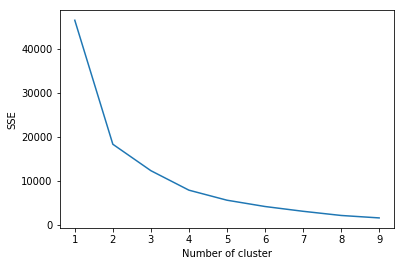

In [58]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

X = clstr

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    X["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [61]:
kmeans = KMeans(n_clusters=4, max_iter=1000).fit(X)
X["clusters"] = kmeans.labels_

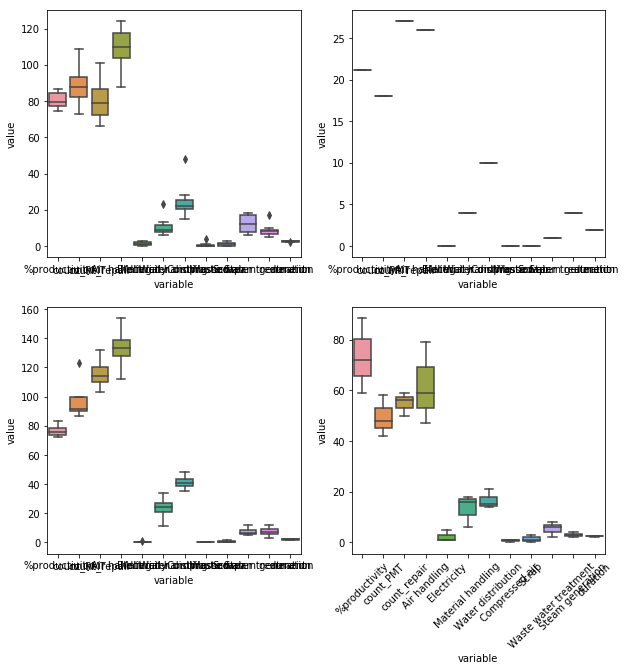

In [76]:
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(10,10))

ax = sns.boxplot(x="variable", y="value", data=pd.melt(X.loc[X['clusters'] == 0, '%productivity':'duration']), ax=axes[0, 0])
ax = sns.boxplot(x="variable", y="value", data=pd.melt(X.loc[X['clusters'] == 1, '%productivity':'duration']), ax=axes[0, 1])
ax = sns.boxplot(x="variable", y="value", data=pd.melt(X.loc[X['clusters'] == 2, '%productivity':'duration']), ax=axes[1, 0])
ax = sns.boxplot(x="variable", y="value", data=pd.melt(X.loc[X['clusters'] == 3, '%productivity':'duration']), ax=axes[1, 1])

for item in ax.get_xticklabels():
    item.set_rotation(45)

plt.show()

In [75]:
X.loc[:, 'clusters']

name
Abdul Rachman            3
Abdul Rahman             0
Abdul Rosid              0
Adli Rizky Hermayadhi    2
Alpiansyah               2
Angga Muhamad Syukur     2
Dede Sulaeman            2
Heriady                  0
M Gufrans Iqbal G        0
Mochammad Romdon         0
Rahmadhiyanto            1
Rohmat                   3
Sapari                   3
Wahyudin                 0
Wira Ardiansyah          0
Name: clusters, dtype: int32